In [4]:
!pip install smolagents google-generativeai  litellm

In [3]:
import os
from google.colab import userdata
os.environ['GOOGLE_API_KEY']=userdata.get('GOOGLE_API_KEY')
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')



In [7]:
from smolagents import CodeAgent , HfApiModel
from smolagents import DuckDuckGoSearchTool

In [15]:
model = HfApiModel()
agent = CodeAgent(tools=[DuckDuckGoSearchTool()],model=model)

In [16]:
response= agent.run("What is the latest update about Los Angales California Jan,2025?")
print(response)

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ What is the latest update about Los Angales California Jan,2025?                                                                                                                                     │
│                                                                                                                                                                                                      │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [17]:
response = agent.run("what is the result of test match 2025?")
response

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ what is the result of test match 2025?                                                                                                                                                               │
│                                                                                                                                                                                                      │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

'The result of a test match in 2025 is not yet available.'

In [23]:
print(agent.system_prompt)

You are an expert assistant who can solve any task using code blobs. You will be given a task to solve as best you can.
To do so, you have been given access to a list of tools: these tools are basically Python functions which you can call with code.
To solve the task, you must plan forward to proceed in a series of steps, in a cycle of 'Thought:', 'Code:', and 'Observation:' sequences.

At each step, in the 'Thought:' sequence, you should first explain your reasoning towards solving the task and the tools that you want to use.
Then in the 'Code:' sequence, you should write the code in simple Python. The code sequence must end with '<end_code>' sequence.
During each intermediate step, you can use 'print()' to save whatever important information you will then need.
These print outputs will then appear in the 'Observation:' field, which will be available as input for the next step.
In the end you have to return a final answer using the `final_answer` tool.

Here are a few examples using n

In [25]:
print(agent.authorized_imports)

['re', 'queue', 'random', 'time', 'collections', 'itertools', 'math', 'datetime', 'statistics', 'unicodedata', 'stat']


In [27]:
response = agent.run("stock price of nvidia from 2022 to 2024 ,dec.")
response

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ stock price of nvidia from 2022 to 2024 ,dec.                                                                                                                                                        │
│                                                                                                                                                                                                      │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

{'December 2022': 14.6, 'December 2023': 49.51, 'December 2024': 134.29}

# additional info

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ stock price of nvidia from 2022 to 2024. Create a line graph.                                                                                                                                        │
│                                                                                                                                                                                                      │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[*********************100%***********************]  1 of 1 completed


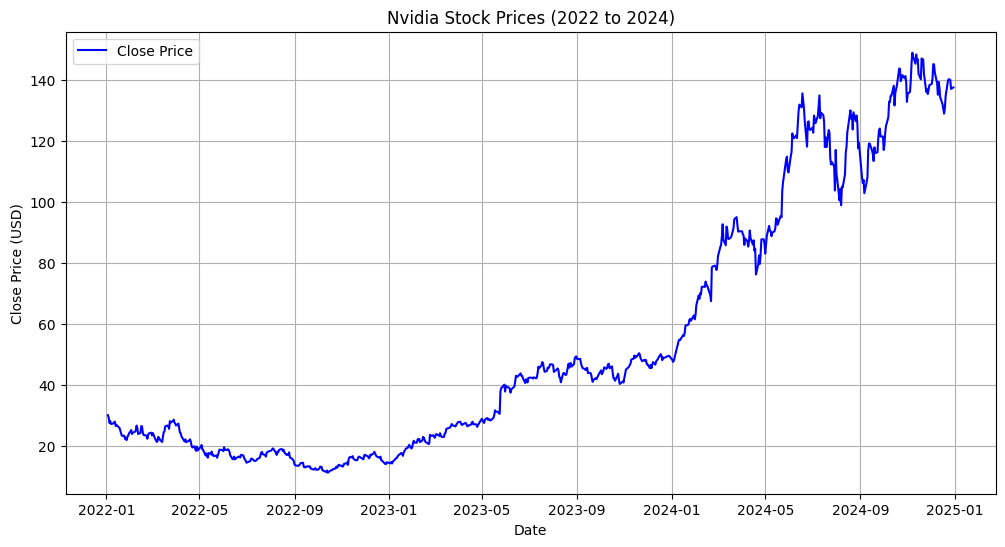

Out: None
[Step 3: Duration 8.04 seconds| Input tokens: 14,140 | Output tokens: 974]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
 ─ Executing this code: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("The line graph of Nvidia's stock prices from 2022 to 2024 has been plotted.")                                                                                                           
 ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
Out - Final answer: The line graph of Nvidia's stock prices from 2022 to 2024 has been plotted.
[Step 4: Durati

"The line graph of Nvidia's stock prices from 2022 to 2024 has been plotted."

In [31]:
agent = CodeAgent(tools=[DuckDuckGoSearchTool()], model=model , additional_authorized_imports=['math', 'yfinance', 'pandas', 'requests', 'bs4', 'matplotlib'])
agent.run("stock price of nvidia from 2022 to 2024. Create a line graph.")